## Course Project

**Instructions:** <br>
a. In the course project, you will analyze a real-world dataset on credit card fraud detection. You will write a report on your data analysis using Jupyter Notebook. <br>
b. For each step, make sure to explain what you are doing, annotate your results, and provide your interpretation. <br>
c. When you finish, make sure to use `Kernel` -> `Restart and Run All` to restart the kernel and rerun the entire notebook to generate the desired outputs, before submitting your project report. <br>
d. Upload your .ipynb file to Canvas for grading. <br>
e. All questions related to the course project shall be posted in the Discussions section on Canvas! <br>
<br>

**Policy:** <br>
The course project is worth 25 points, counting towards 25% of the course final score. <br>

Late submission, empty submission or no submission receives 0 point. Please note that in order to pass the course, at least 30% of the total score for the project must be obtained. In case of special circumstances, email the instructor directly ahead of time. 

### Credit Card Fraud Detection
You can download the csv files from the project folder on Canvas.  <br>

#### Context
Credit card companies aim to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
The dataset contains transactions made by credit cards in September 2013 by european cardholders.
Transactions occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, as the positive class (frauds) account for 0.172% of all transactions. <br>

It contains numerical input variables V1-V28 which are the result of a Principal Component Analysis (PCA) transformation, as original features are not provided due to confidentiality issues. Features that have not been transformed with PCA are 'Time' and 'Amount'. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' denotes the transaction Amount. 'Class' is the response variable (labelled outcome) and it takes value 1 in case of fraud and 0 otherwise.  <br>

### Module 1: Data Exploration
Load `creditcard_train.csv` and explore the dataset. How do the data look like? Are there any missing values? What do you do with missing values, i.e. removal, imputation, etc.?<br>
Are there any outliers? What do you do with outliers, i.e. drop them, explore the effects of outliers on models, etc.? <br>
Record your analysis procedures. For example, 20 observations are removed due to missingness, and 3,000 observations remain for further analysis. <br>

Hint: for removal of extreme outliers, consider: Q1=df.quantile(0.25); Q3=df.quantile(0.75); IQR=Q3-Q1; <br>
Remove samples that are smaller than Q1 - 2.5 * IQR or larger than Q3 + 2.5 * IQR.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard_train.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284657 entries, 0 to 284656
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284657 non-null  float64
 1   V1      284657 non-null  float64
 2   V2      284657 non-null  float64
 3   V3      284657 non-null  float64
 4   V4      284657 non-null  float64
 5   V5      284657 non-null  float64
 6   V6      284657 non-null  float64
 7   V7      284657 non-null  float64
 8   V8      284657 non-null  float64
 9   V9      284657 non-null  float64
 10  V10     284657 non-null  float64
 11  V11     284657 non-null  float64
 12  V12     284657 non-null  float64
 13  V13     284657 non-null  float64
 14  V14     284657 non-null  float64
 15  V15     284657 non-null  float64
 16  V16     284657 non-null  float64
 17  V17     284657 non-null  float64
 18  V18     284657 non-null  float64
 19  V19     284657 non-null  float64
 20  V20     284657 non-null  float64
 21  V21     28

In [4]:
df.isnull().sum()

Time        0
V1          0
V2          0
V3          0
V4          0
V5          0
V6          0
V7          0
V8          0
V9          0
V10         0
V11         0
V12         0
V13         0
V14         0
V15         0
V16         0
V17         0
V18         0
V19         0
V20         0
V21         0
V22       278
V23       520
V24         0
V25         0
V26         0
V27         0
V28         0
Amount      0
Class       0
dtype: int64

In [5]:
print(df[df["Class"] == 1].count())

Time      442
V1        442
V2        442
V3        442
V4        442
V5        442
V6        442
V7        442
V8        442
V9        442
V10       442
V11       442
V12       442
V13       442
V14       442
V15       442
V16       442
V17       442
V18       442
V19       442
V20       442
V21       442
V22       442
V23       442
V24       442
V25       442
V26       442
V27       442
V28       442
Amount    442
Class     442
dtype: int64


## NULL data count
From the above, it can be observed that there are 278 NULL value on the column V22, and 520 NULL value on the column V23.
We may continue by dropping the NULL value since the proportion is small <b>(0.09766% for V22 and 0.182676% for V23)</b>

In [6]:
df.dropna(inplace = True)

In [7]:
print(df[df["Class"] == 1].count()) # didn't drop any row that is a fraud transaction

Time      442
V1        442
V2        442
V3        442
V4        442
V5        442
V6        442
V7        442
V8        442
V9        442
V10       442
V11       442
V12       442
V13       442
V14       442
V15       442
V16       442
V17       442
V18       442
V19       442
V20       442
V21       442
V22       442
V23       442
V24       442
V25       442
V26       442
V27       442
V28       442
Amount    442
Class     442
dtype: int64


In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,...,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000,283859.000000
mean,94849.267513,-0.000167,-0.000924,0.000840,-0.001027,0.000986,0.000320,0.001084,-0.000325,0.000471,...,0.000032,-0.000061,0.000029,-0.000034,-0.000195,-0.000047,-0.000069,-0.000004,88.425282,0.001557
std,47485.589194,1.957120,1.651392,1.510740,1.414242,1.378982,1.332545,1.231812,1.193685,1.097651,...,0.734539,0.726050,0.625304,0.605745,0.521419,0.482196,0.403610,0.330418,250.417781,0.039430
min,0.000000,-56.407510,-72.715728,-48.325590,-5.683171,-113.743300,-26.160506,-43.557240,-73.216718,-13.434070,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565680,-15.430080,0.000000,0.000000
25%,54233.000000,-0.920680,-0.598997,-0.889830,-0.848736,-0.691172,-0.768154,-0.553805,-0.208758,-0.642788,...,-0.228575,-0.542885,-0.162195,-0.354648,-0.317359,-0.326893,-0.070855,-0.052952,5.600000,0.000000
50%,84759.000000,0.017308,0.065413,0.179494,-0.020497,-0.054066,-0.274031,0.040309,0.022302,-0.051331,...,-0.029437,0.007510,-0.011591,0.040912,0.016212,-0.052016,0.001322,0.011233,22.000000,0.000000
75%,139344.000000,1.315648,0.803676,1.026844,0.742006,0.612485,0.398944,0.570649,0.327335,0.597329,...,0.186632,0.529301,0.148065,0.439530,0.350601,0.240762,0.091043,0.078314,77.250000,0.000000
max,172792.000000,2.454930,22.057730,9.382558,16.875340,34.801666,73.301630,120.589500,20.007208,15.594990,...,27.202839,10.503090,22.528410,4.584549,7.519589,3.517346,31.612200,33.847808,25691.160000,1.000000


In [9]:
def drop_outliers(df: pd.DataFrame, cols: list) -> pd.DataFrame:
    for col in cols:
        Q1 = np.quantile(df[col], 0.25)
        Q3 = np.quantile(df[col], 0.75)
        IQR = Q3 - Q1

        # Remove samples that are smaller than Q1 - 2.5 * IQR or larger than Q3 + 2.5 * IQR.
        leftOutliers = Q1 - 2.5*IQR
        rightOutliers = Q3 + 2.5*IQR

        # KEEP the Fraud Transactions data by specify the "Class" == 1
        # The Fraud Transactions are mostly the subsets of the outliers so we couldn't simply drop all the Outliers.
        temp = df[((df[col] >= leftOutliers) & (df[col] <= rightOutliers)) | (df["Class"] == 1)]

    return temp

In [10]:
df = drop_outliers(df=df, cols=df.columns)
df.reset_index(inplace=True, drop=True)

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283854,172786.0,-11.881120,10.071780,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
283855,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
283856,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296826,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265746,-0.087371,0.004455,-0.026561,67.88,0
283857,172788.0,-0.240440,0.530482,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546669,0.108821,0.104533,10.00,0


### Outliers Analysis
That is 284657 - 283859 = 798 (0.280337%) rows of the whole Dataframe were dropped due to outliers (excluding the Fraud Transactions.) Since there are no more NULL value and outliers, the dataset is clean.
<br><br>The rest of 283859 observations are reserved for further analysis. The next step is to visualize to see the trend of the data using Data Visualizing of Seaborn and Pyplot library.

### Module 2: Data Visualization
What are the distributions of variables? Are the variables distributed differently in the Fraud group and in the Normal group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important, and you may state in your findings that other variables a, b, c have similar patterns.

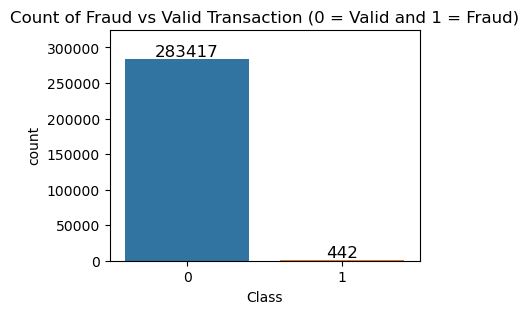

In [11]:
fraud = df[df["Class"] == 1]
valid = df[df["Class"] == 0]

plt.figure(figsize=(4, 3))
count_plot = sns.countplot(data=df, x="Class")
plt.title("Count of Fraud vs Valid Transaction (0 = Valid and 1 = Fraud)")

for p in count_plot.patches:
    count_plot.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', 
                        fontsize=12)

plt.ylim(0,325000)
plt.show()

From the bar graph **Count of Fraud vs Valid Transaction**, it can be observed that the dataset is pretty much imbalanced. This result helps to decide in the next step of Training Dataset by undersampling to avoid "Overfit"

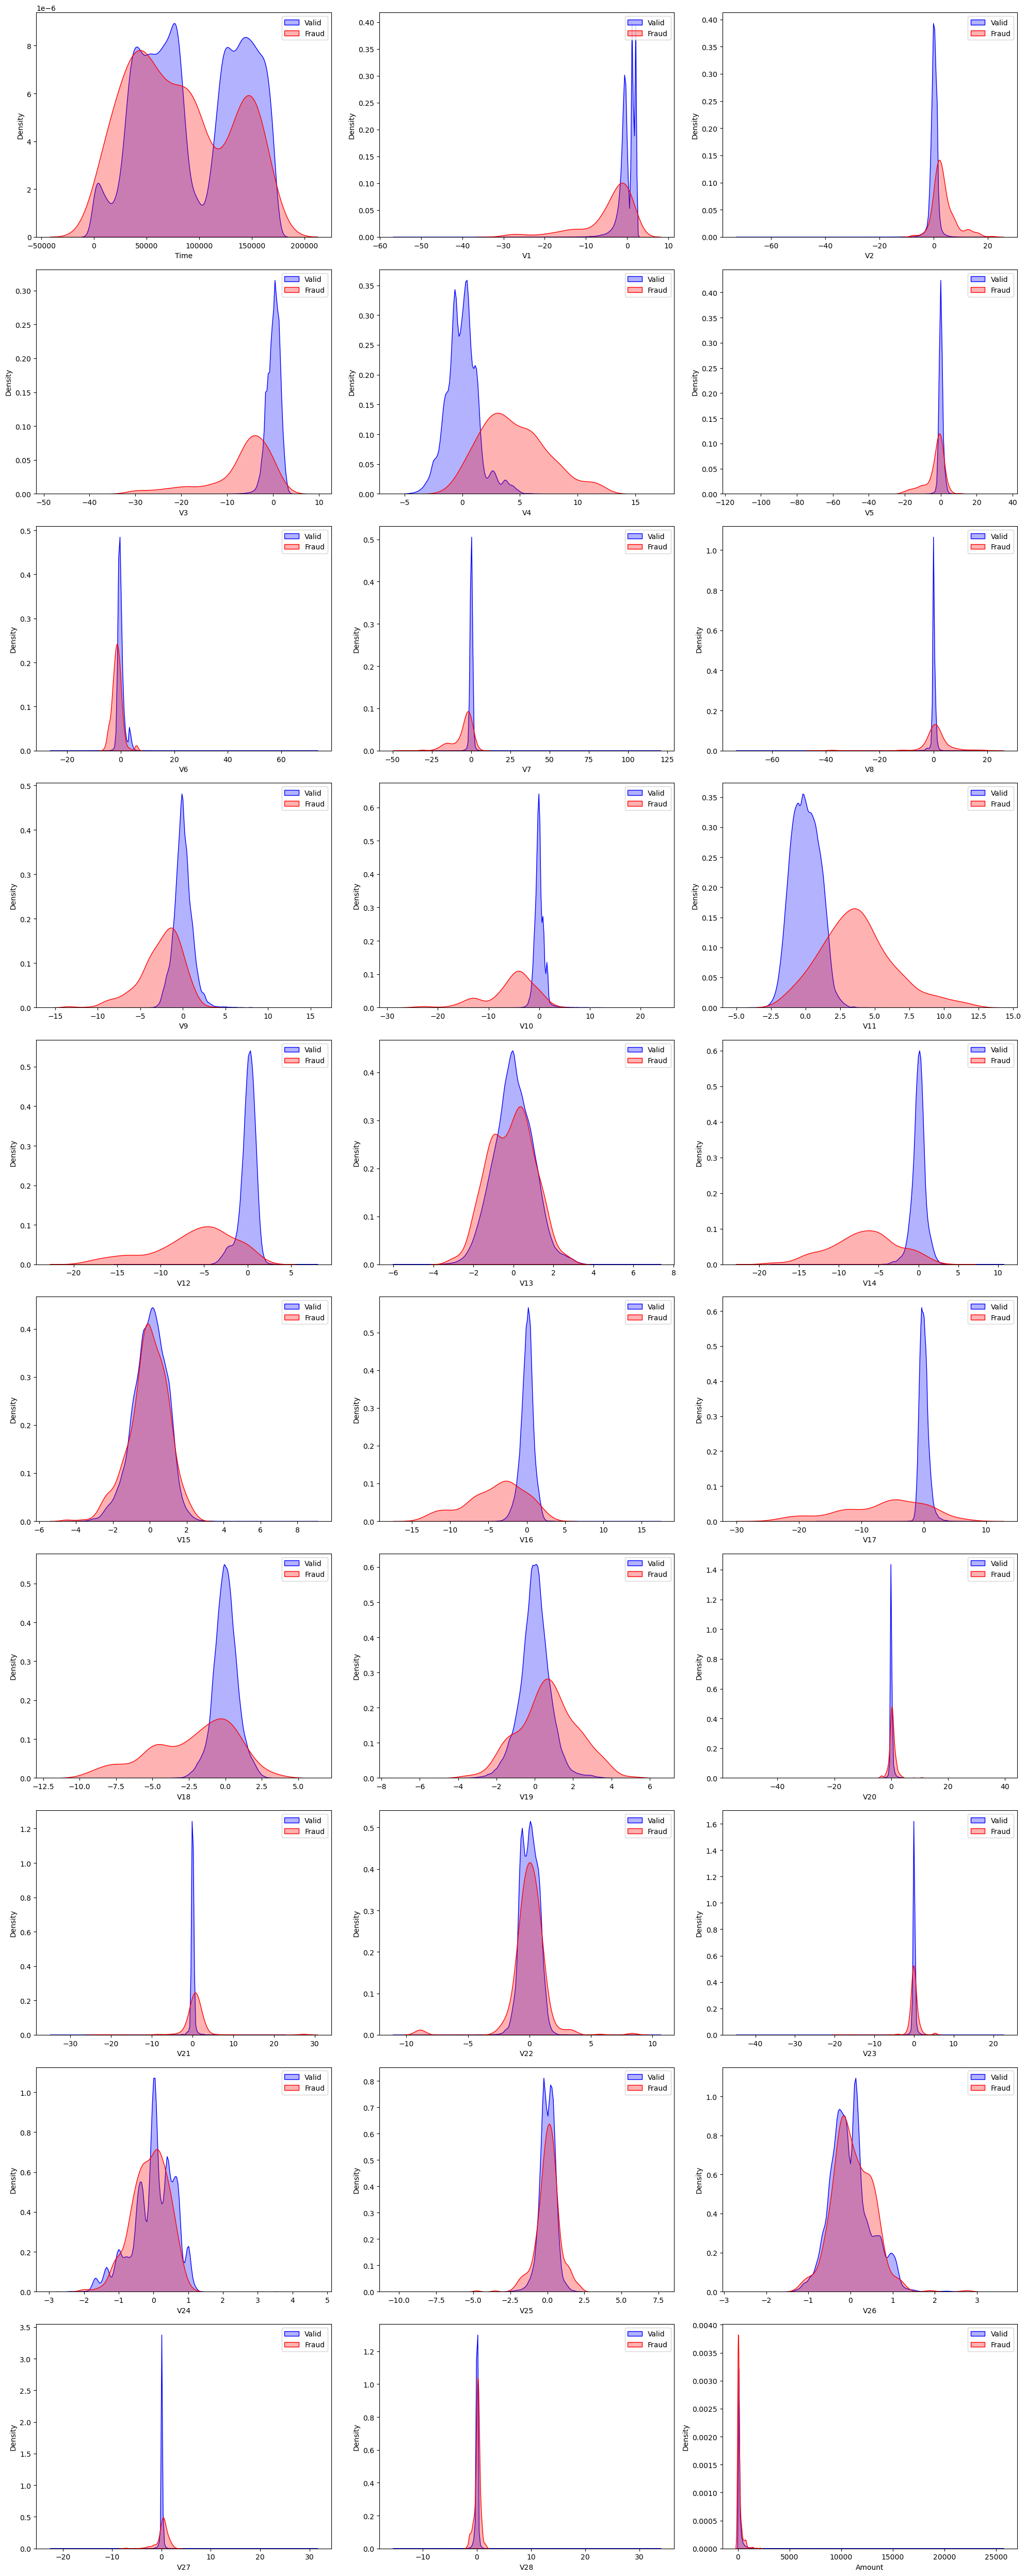

In [12]:
# Visualize the difference between valid and fraud transaction

fig = plt.figure(figsize=(20,50))
for idx, col in enumerate(df.iloc[:,:30]): # Excluding "Class" = 30 columns
    ax = fig.add_subplot(10, 3, idx+1)
    sns.kdeplot(valid[col], color='blue', label='Valid', fill=True, alpha=0.3)
    sns.kdeplot(fraud[col], color='red', label='Fraud', fill=True, alpha=0.3)
    ax.set_xlabel(col)
    ax.legend()

fig.tight_layout()
plt.show()

**First Subplot**: The Fraud Transactions used relatively less amount of time to do the transactions than the valid one
<br>**V12, V14, V17**: The fraud transactions are much more distributed in this attribute than the valid transactions

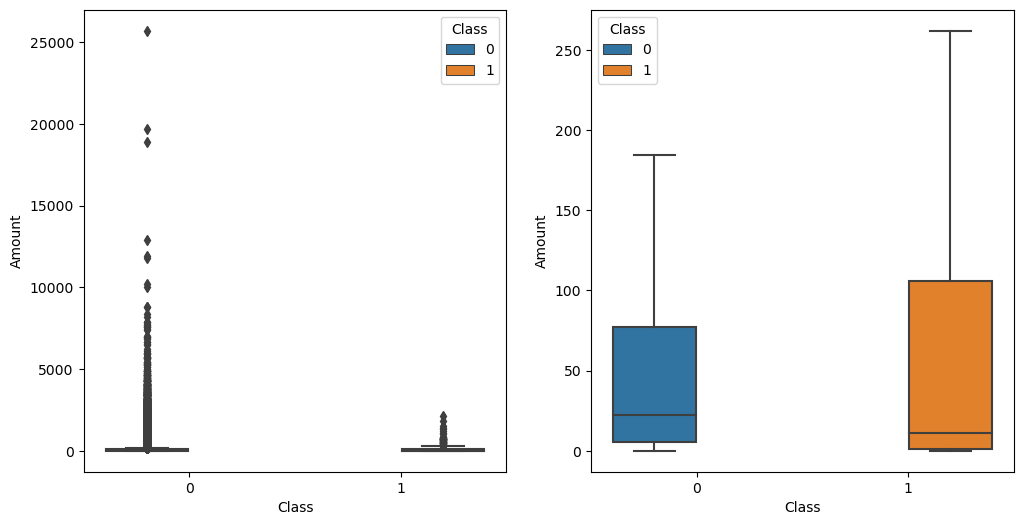

In [13]:
# The Amount graph is not giving much information, so using another grpah type to visualize
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class", data=df, showfliers=True)
sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class", data=df, showfliers=False)
plt.show()

**Amount Observaions**: The graphs show that the fraud transactions tend to have the same amount and not big. It also can be observed that the real transaction have a larger mean value. However, this finding does not show noticeable difference between each Class. The amount, therefore, might be lower correlated attribute than others.

**Finding 1**: In every graphs (exluded the Time and Amount attributes), the valid group are distributed around 0 (most likely Normal Distribution due to Central Limit Theorem of a very large observations). The fraud group, otherwise, is more distributed.
<br>
**Finding 2**: Only noticeable number of attributes (V12, V14, V17, and more) are correlated to the fraud group (the fraud graph is noticeably much more distributed than the valid one). Thus the data have too much dimensions, requiring Dimension Reduction Method in the next step

### Module 3: Dimension Reduction
Apply unsupervised learning methods to achieve dimension reduction. Visualize and interpret the results. Any dimension reduction algorithms can be used.

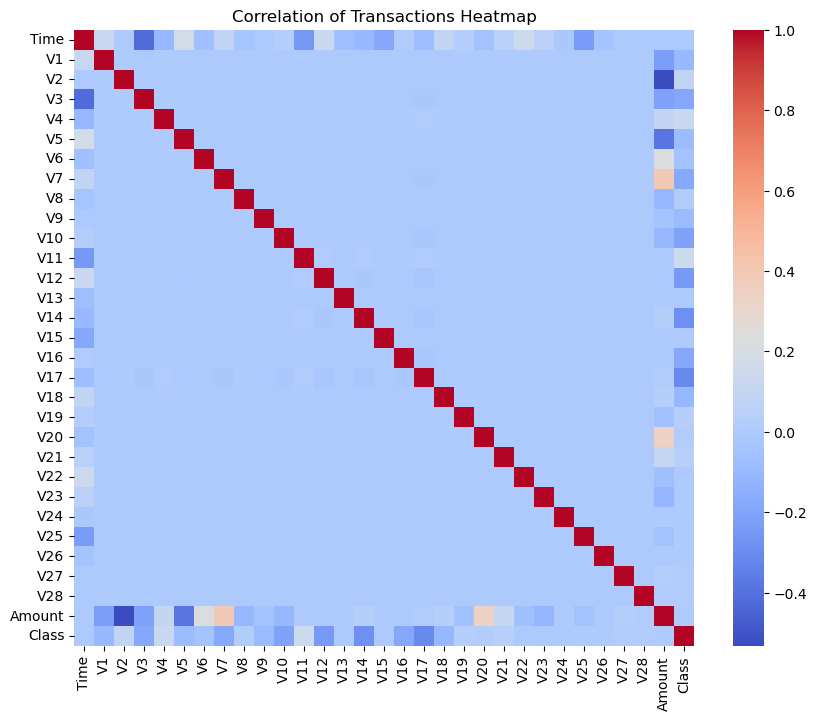

In [14]:
df_corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, cmap='coolwarm')
plt.title('Correlation of Transactions Heatmap')
plt.show()

From the heatmap, it can be seen that V7 and V20 have some correlation with the parameter "Amount"
The target parameter is "Class", which V17 tends to have the most negative correlation, following by V14 and V12

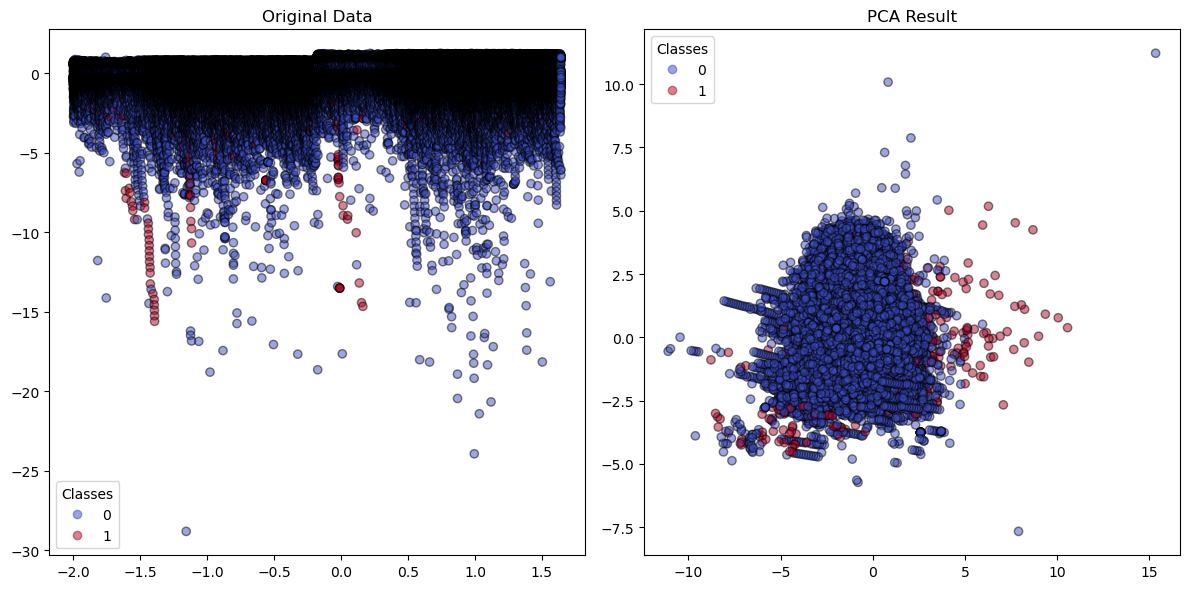

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop('Class', axis=1)
y = df['Class']

# Scaling Data
scaler = StandardScaler()
dataScaled = scaler.fit_transform(X)

# KBest Feature Selection
k = 18
selector = SelectKBest(score_func=f_classif, k=k)
X_kbest = selector.fit_transform(dataScaled, y)

# PCA
n = 15
model_pca = PCA(n_components=n, random_state=42)
data_pca = model_pca.fit_transform(X_kbest)

# Create a new Dataframe from PCA
X_pca = pd.DataFrame(data=data_pca, columns=[f'PC{i+1}' for i in range(n)])

# Comparison Graph before and after PCA
plt.figure(figsize=(12, 6))

# Before PCA
plt.subplot(1, 2, 1)
sc1 = plt.scatter(dataScaled[:, 0], dataScaled[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.5)
plt.title('Original Data')
plt.legend(*sc1.legend_elements(), title="Classes")

# After PCA
plt.subplot(1, 2, 2)
sc2 = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.5)
plt.title('PCA Result')
plt.legend(*sc2.legend_elements(), title="Classes")

plt.tight_layout()
plt.show()

**Dimension Reduction Observations**
<br><br>
The attributes are standardized using **StandardScaler** and then selected the correlated features using **KBest** method, following by the PCA method.
<br>
After applying the **PCA method**, it ables to formed clusters of fraud and non-fraud in a very same area, ready to be trained in the next step.


In [16]:
X_pca.shape

(283859, 15)

In [17]:
N = sum(df['Class'] == 1) # N = fraud size

fraud_indices = df[df["Class"] == 1].index
valid_indices = df[df["Class"] == 0].index

np.random.seed(0)
random_indices = np.random.choice(valid_indices, N, replace=False)
combined_indices = np.concatenate([fraud_indices, random_indices])

new_df = X_pca.loc[combined_indices] # select X columns
y = y.loc[combined_indices] # select y columns

# combine df
new_df['Class'] = y

# Shuffle the df
new_df = new_df.sample(frac=1, random_state=42)

new_df.shape

(884, 16)

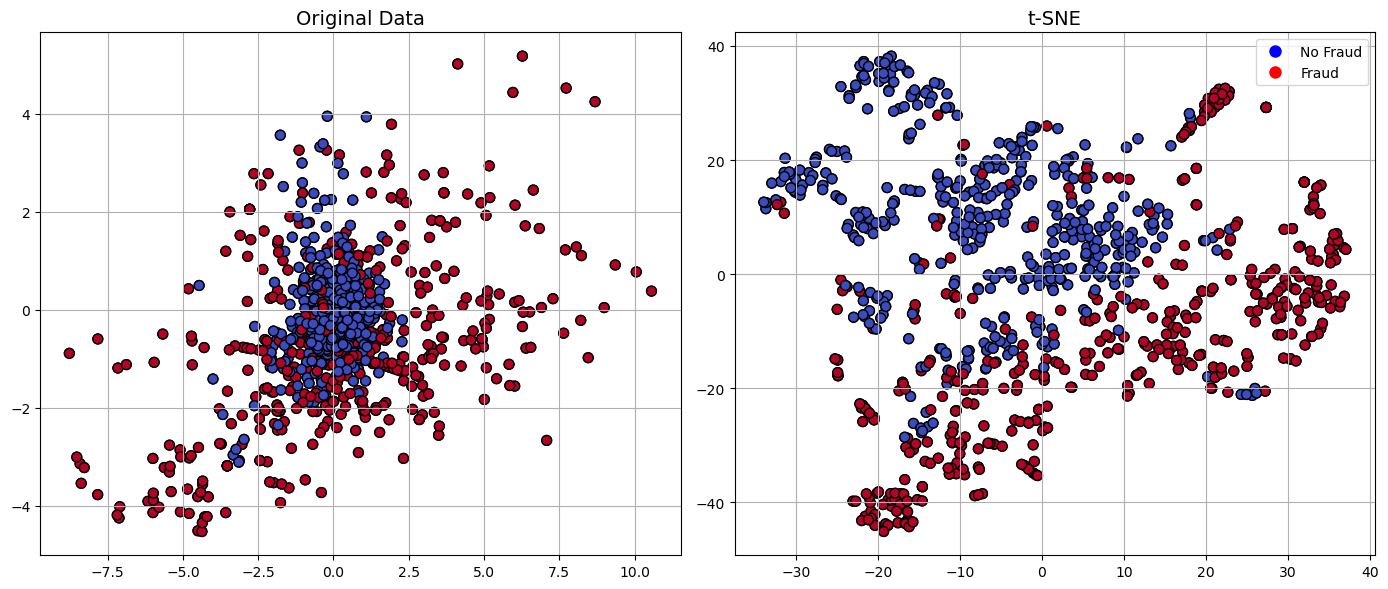

In [18]:
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

# since t_sne is so slow, I did select X, y using undersample
X_undersample = new_df.drop('Class', axis=1)
y_undersample = new_df["Class"]

X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_undersample.values)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# original data
ax0 = axes[0]
ax0.scatter(X_undersample.iloc[:, 0], X_undersample.iloc[:, 1], c=(y_undersample == 0), cmap='coolwarm', label='No Fraud', linewidths=1, edgecolor='k', s=50)
ax0.scatter(X_undersample.iloc[:, 0], X_undersample.iloc[:, 1], c=(y_undersample == 1), cmap='coolwarm', label='Fraud', linewidths=1, edgecolor='k', s=50)
ax0.set_title('Original Data', fontsize=14)
ax0.grid(True)

# t-SNE result
ax1 = axes[1]
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_undersample == 0), cmap='coolwarm', label='No Fraud', linewidths=1, edgecolor='k', s=50)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_undersample == 1), cmap='coolwarm', label='Fraud', linewidths=1, edgecolor='k', s=50)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)

blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Fraud')
red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Fraud')
ax1.legend(handles=[blue_patch, red_patch])

plt.tight_layout()
plt.show()

#### Observation for t-SNE algorithm
The t-SNE algorithm is able to detect clusters and seperate them clearly, meaning that further predictive models will perform well in separating fraud cases from non-fraud cases.

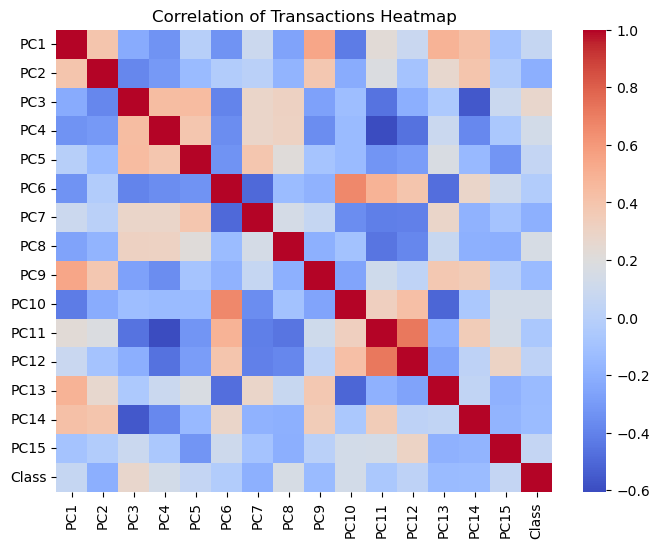

In [19]:
new_df_corr = new_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(new_df_corr, cmap='coolwarm')
plt.title('Correlation of Transactions Heatmap')
plt.show()

**After Dimension Reduction** using PCA methods by, we can observed that every attributes are somewhat correlated to the target **Class**.

### Module 4: Classification
Choose three classification methods and build classification models, using 5-fold cross-validation. <br>

Further, load `creditcard_test.csv` and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the overall accuracy and the confusion matrix. <br>

Hint: because the dataset is highly unbalanced, consider undersampling, i.e. randomly select N normal observations of the same size as the N fraud observations, and use N+N=2N samples for model fitting and training. 

In [20]:
###pick 3 classification methods, and methods not in the below list can also be used; you can also pick more than three methods
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [21]:
# Initialize X, y from the new df
X_sample = new_df.drop("Class", axis=1)
y_sample = new_df["Class"]

In [22]:
from sklearn.model_selection import KFold, cross_val_score

DT_clf = DecisionTreeClassifier(random_state=42) # Decision Tree Classifier
RF_clf = RandomForestClassifier(n_estimators=100, random_state=42) # Random Forest Classifier
KN_clf = KNeighborsClassifier(n_neighbors=8) # KNeighbors Classifier

k_folds = KFold(n_splits = 5)

models = [DT_clf, RF_clf, KN_clf]

for model in models:
    scores = cross_val_score(model, X_sample, y_sample, cv = k_folds)

    print(f"Cross Validation Scores of the model {str(model).split('Classifier')[0]}: {scores}\n")
    print(f"Average CV Score: {scores.mean()}\n")

Cross Validation Scores of the model DecisionTree: [0.81355932 0.85310734 0.83615819 0.84745763 0.82386364]

Average CV Score: 0.8348292244478686

Cross Validation Scores of the model RandomForest: [0.91525424 0.91525424 0.89265537 0.87570621 0.88636364]

Average CV Score: 0.8970467385721623

Cross Validation Scores of the model KNeighbors: [0.85875706 0.90960452 0.87570621 0.8700565  0.89204545]

Average CV Score: 0.881233949666153



In [23]:
dfTest = pd.read_csv("creditcard_test.csv")
X_test = dfTest.drop("Class", axis=1)
y_test = dfTest["Class"]

dfTest.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,40086,1.083693,1.179501,-1.346150,1.998824,0.818034,-0.771419,0.230307,0.093683,-0.167594,...,-0.312000,-0.639700,-0.120249,-0.180218,0.609283,-0.339524,0.096701,0.114972,1.00,1
1,93860,-10.850282,6.727466,-16.760583,8.425832,-10.252697,-4.192171,-14.077086,7.168288,-3.683242,...,2.541637,0.135535,-1.023967,0.406265,0.106593,-0.026232,-1.464630,-0.411682,78.00,1
2,14152,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,...,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1.00,1
3,27219,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,...,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,99.99,1
4,84204,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1


In [24]:
# perform PCA on the test dataset
# Scaling Data
test_scaled = scaler.fit_transform(X_test) # using the train scaler model

# PCA
test_pca = model_pca.fit_transform(test_scaled) # using the train pca model

# Create a new Dataframe from PCA
test_pca = pd.DataFrame(data=test_pca, columns=[f'PC{i+1}' for i in range(n)])


# Combine Test dataset
test_fraud_indices = dfTest[dfTest["Class"] == 1].index
test_valid_indices = dfTest[dfTest["Class"] == 0].index

test_combined_indices = np.concatenate([test_fraud_indices, test_valid_indices])

df_test = test_pca.loc[test_combined_indices] # select X columns
y_test = y_test.loc[test_combined_indices] # select y columns

# combine df
df_test['Class'] = y_test

# Shuffle the df
df_test = df_test.sample(frac=1, random_state=42)


df_test.shape

(150, 16)

Model: DecisionTreeClassifier
Accuracy on Test Set:  0.66
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.62      0.71       100
           1       0.49      0.74      0.59        50

    accuracy                           0.66       150
   macro avg       0.66      0.68      0.65       150
weighted avg       0.72      0.66      0.67       150



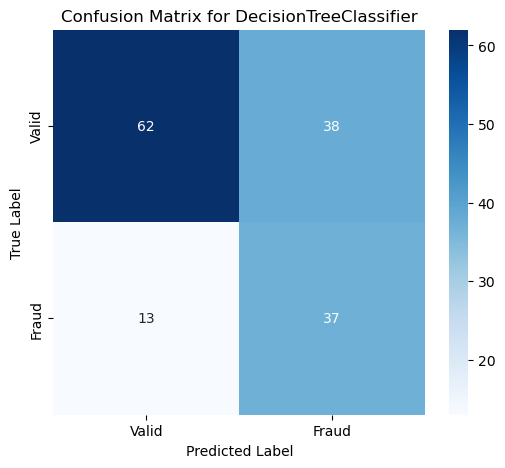

Model: RandomForestClassifier
Accuracy on Test Set:  0.8933333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.92       100
           1       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.85      0.87       150
weighted avg       0.90      0.89      0.89       150



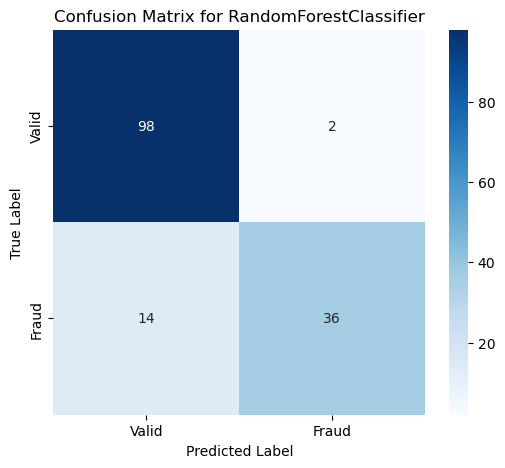

Model: KNeighborsClassifier
Accuracy on Test Set:  0.7933333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86       100
           1       0.91      0.42      0.58        50

    accuracy                           0.79       150
   macro avg       0.84      0.70      0.72       150
weighted avg       0.82      0.79      0.77       150



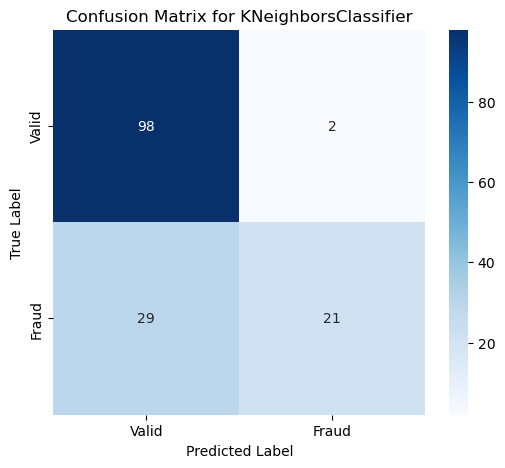

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_test = df_test.drop("Class", axis=1)
y_test = df_test["Class"]

for model in models:
    model.fit(X_sample, y_sample)
    
    y_predict = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_predict)
    print(f"Model: {model.__class__.__name__}")
    print("Accuracy on Test Set: ", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_predict))
    
    cm = confusion_matrix(y_test, y_predict)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Valid', 'Fraud'], yticklabels=['Valid', 'Fraud'])
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

           Model  Accuracy
0  Decision Tree  0.660000
1  Random Forest  0.893333
2     KNeighbors  0.793333


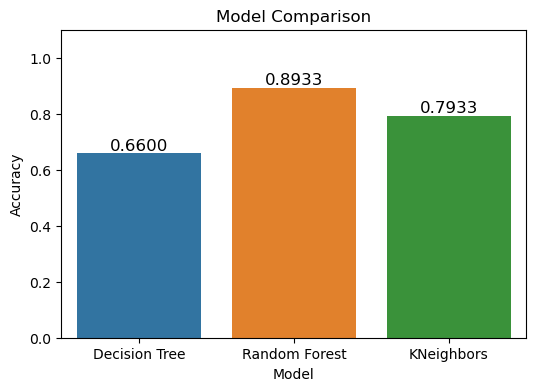

In [26]:
models_name = ['Decision Tree', 'Random Forest', 'KNeighbors']
accuracies = []
feature_importances = {}

for model in models_name:
    if model == 'Decision Tree':
        DT_clf.fit(X_sample, y_sample)
        y_predict = DT_clf.predict(X_test)
        feature_importances['Decision Tree'] = DT_clf.feature_importances_
    elif model == 'Random Forest':
        RF_clf.fit(X_sample, y_sample)
        y_predict = RF_clf.predict(X_test)
        feature_importances['Random Forest'] = RF_clf.feature_importances_
    elif model == 'KNeighbors':
        KN_clf.fit(X_sample, y_sample)
        y_predict = KN_clf.predict(X_test)
        # KNeighbors doesn't have feature importance
    
    accuracy = accuracy_score(y_test, y_predict)
    accuracies.append(accuracy)

comparison_df = pd.DataFrame({
    'Model': models_name,
    'Accuracy': accuracies
})

print(comparison_df)


plt.figure(figsize=(6,4))
b = sns.barplot(x='Model', y='Accuracy', data=comparison_df)
plt.title('Model Comparison')
plt.ylim(0, 1.1)

for p in b.patches:
    b.annotate(f'{p.get_height():.4f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=12)
    
plt.show()

### Module 5: Summary
Summarize your findings and draw conclusions.

The **Average Cross Validation Score** of 3 models for training the Datasets are relatively the same, with **Random Forest** having the most CV score of 89.70%, indicating should be the most suitable model. The KNeighbors model have a score of 88.12% and Decision Tree model have a score of 83.48%

After testing on the test dataset, it can be seen on the model score comparison that **Random Forest** performed the best with the **Accuracy Score of 89.33%**, as hypothesized, following by **KNeighbors (79.33%)** and **Decision Tree (66.00%)**.

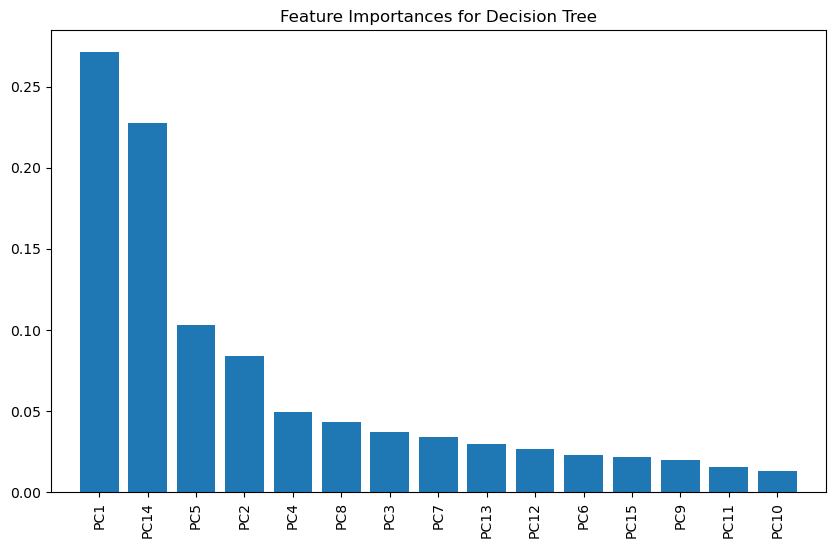

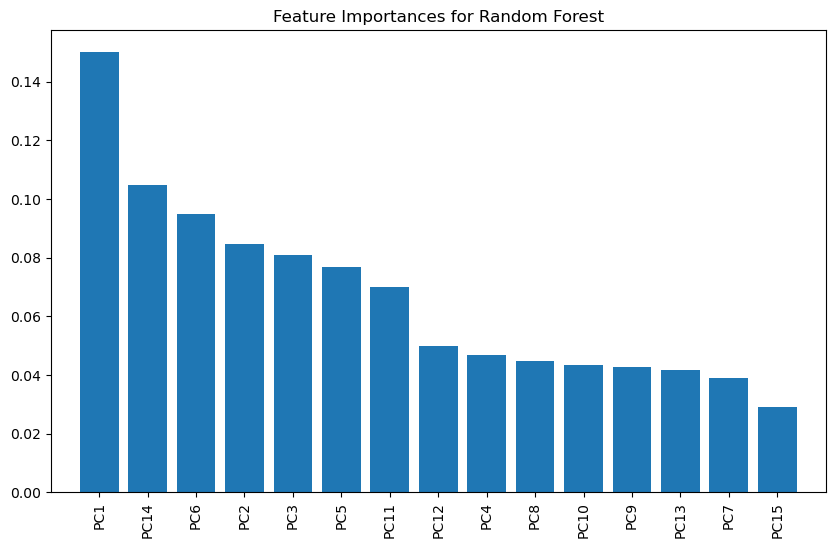

In [27]:
# Observe the feature importance of each model (KNeighbors excluded)
for model in feature_importances.keys():
    plt.figure(figsize=(10, 6))
    importances = feature_importances[model]
    indices = np.argsort(importances)[::-1]
    plt.title(f'Feature Importances for {model}')
    plt.bar(range(X_sample.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_sample.shape[1]), np.array(X_sample.columns)[indices], rotation=90)
    plt.xlim([-1, X_sample.shape[1]])
    plt.show()

As shown on the both graphs, it can be observed that attribute Principal Components 'PC1' and 'PC14' are the most important features for both Decision Tree and Random Forest Algoritms